# Data Visualisation 1: Plot fundamentals

How to visualise...
1. Amounts - simple differences in amounts and grouped differences
2. Distributions - histograms, kde, grouped with violin and box plots






## The topic

Data visualisation is both about the presentation of results, but also their analysis. Being able to visualise data in an intuitive way allows us to better understand our data, as well as find trends and patterns that otherwise would not have been apparent to us. There are many libraries for data visualisation in python including...

- Matplotlib - the classic library that many others are built on top of
- Seaborn
- Plotly
- Bokeh

For a great resource on visualisation in Python, visit [The Python Graph Gallery](https://www.python-graph-gallery.com/)

## About Seaborn

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/seaborn_logo.png?raw=true" height=200 align="left">


The Seaborn library is built on top of matplotlib, meaning that it generates figures and objects compatible with the matplotlib library. However, it is designed to make complex analytical plotting simpler with single commands that produce otherwise very complex plots. Seaborn closely integrates with Pandas, making our job even easier.


### The Data

<img src="https://github.com/Minyall/sc207_materials/blob/master/images/RMS_Titanic_3.jpg?raw=true" align="right" width=150>

Today we will be using the Titanic dataset, which provides us information on the pasengers on the ill fated ship, [RMS Titanic](https://en.wikipedia.org/wiki/Titanic). Note that whilst a historical event, you may still find some of the discussion upsetting as we consider age, class, gender, family relations and survival. It is commonly used for teaching data exploration and visualisation, which in itself, is something worth questioning!


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
titanic_df = sns.load_dataset('titanic')

In [28]:
# We take a look at the data as normal

titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
titanic_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Here we make some adjustments to our dataframe. 

First we make our `pclass` and `alive` variables into categorical variables. This helps Seaborn understand that they are categories rather than numerical values.

In [31]:
titanic_df['pclass'] = titanic_df['pclass'].astype('category')
titanic_df['alive'] = titanic_df['alive'].astype('category')

Second we make a new column call `n_family` that summarises how many family members a passenger has in total by combining the two types of count.

In [32]:
titanic_df['n_family'] = titanic_df['parch'] + titanic_df['sibsp']

## The logic of visualising
A very basic visualisation would be a bar chart of gender frequency. We can then explore how different variables can be brought into the visual to transform it.

A bar chart is for `categorical` data so it sits in Seaborn's `catplot` function.

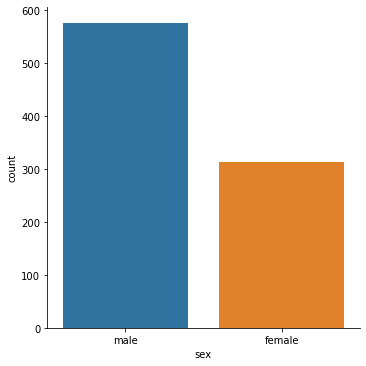

In [69]:
sns.catplot(data=titanic_df, x='sex', kind='count')



We can use the `.set` method to add title and optionally change the x and y axis labels.

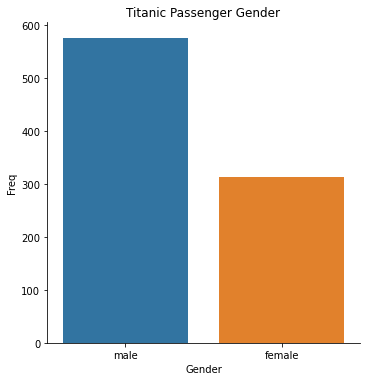

In [88]:
sns.catplot(data=titanic_df, x='sex', kind='count').set(title='Titanic Passenger Gender', xlabel='Gender', ylabel='Freq')


We can also adjust the height and relative width of the image. 
- `height=` default value is 5, provide a bigger number for a taller image.
- `aspect=` represents the width and is a multiplier of the height. For example `aspect=2` would make an image twice as wide as it is tall.

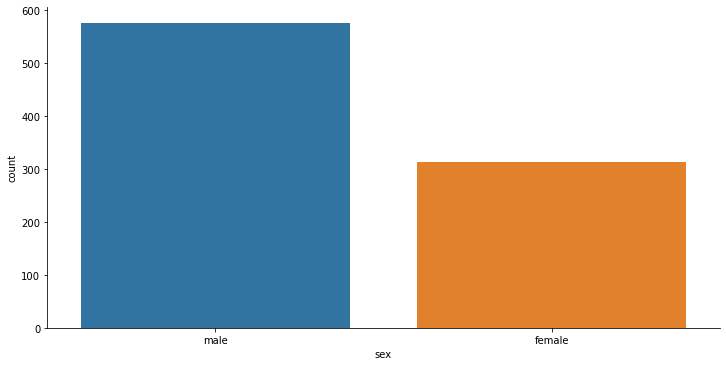

In [96]:
sns.catplot(data=titanic_df, x='sex', kind='count', height=5, aspect=2)


We can introduce another variable such as `survived` via colour (`hue`). This forces Seaborn to find a way to split the data and represent the split by colour.

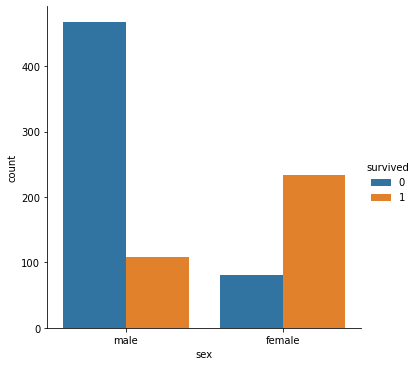

In [71]:
sns.catplot(data=titanic_df, x='sex', kind='count', hue='survived')



We can cut up the data further by splitting by another variable using the `col` or `row` keyword, which produces multiple plots split by the variable.

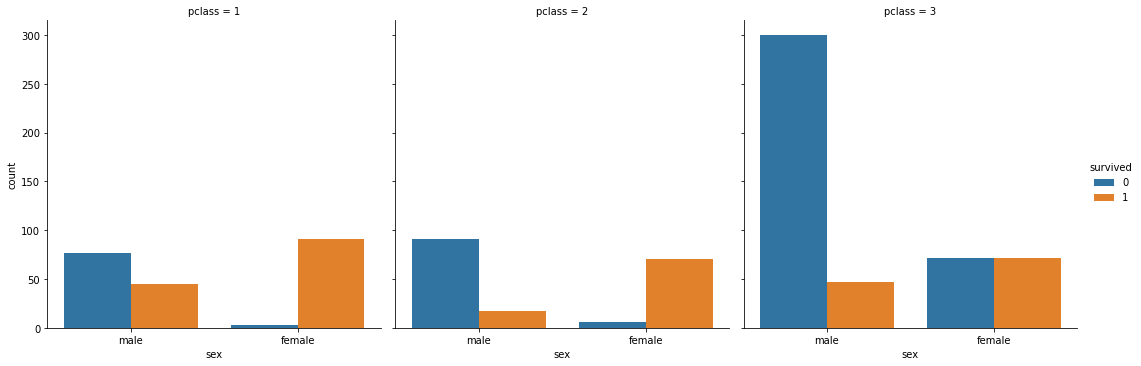

In [72]:
sns.catplot(data=titanic_df, x='sex', kind='count', hue='survived', col='pclass')


### On Increasing Complexity
As we can see the more dimensions we add to our plot, the harder it becomes to intuitively read the plot.
 We are introducing too much information in a way that is difficult to read.
 
It may also be the case that this simple bar chart is not the best way to display some of these variable relationships. Proper data visualisation is both about what variables you choose to display together, and the correct plot style.

### Changing up your plot type

Going beyond simple counts, `catplot` can also show us how numerical variables (such as age, fare, number of family members) relate to categorical (Class, sex, survival). Let's look at how the visualisation of age and class varies depending on the type of plot used.


### Warning! - Bad Plot Ahead
Let's make a bad plot to demonstrate this.

Say we wanted to see the the distribution of passenger age, so we just changed our x axis to a non-categorical variable like age and counted the number of each age.

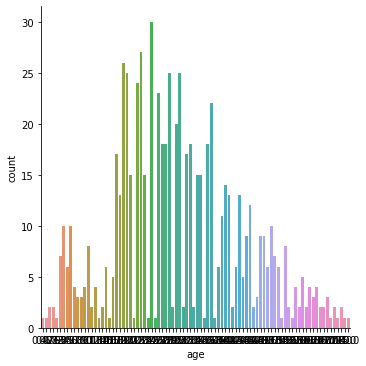

In [83]:
sns.catplot(data=titanic_df, x='age',kind='count')


It has done the job we requested, but it was not a good request! It has taken every individual age, counted frequency of passengers with each age and provided us a bar for each. It's already hard to read so adding another variable to the mix will only complicate things further.

We could use a `strip` plot instead which is more suitable for plotting a numerical range (`age`) against a set of categories (`pclass`).

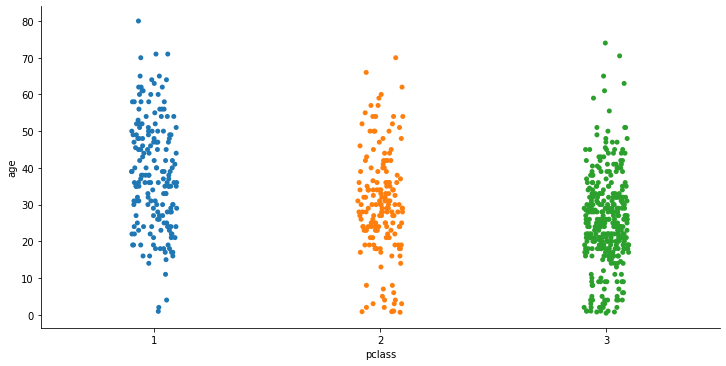

In [100]:
sns.catplot(data=titanic_df, x='pclass', y='age', kind='strip', aspect=2)

First a strip plot shows us the individual passenger points against the y axis of Age. How far left or right they are within their strip is purely about visibility.

This improves massively on the previous count plot in terms of visible clarity, though it is still difficult to determine the distribution of ages because we can't easily distinguish points when they start concentrating.

We have a solution for this called a `boxplot`.

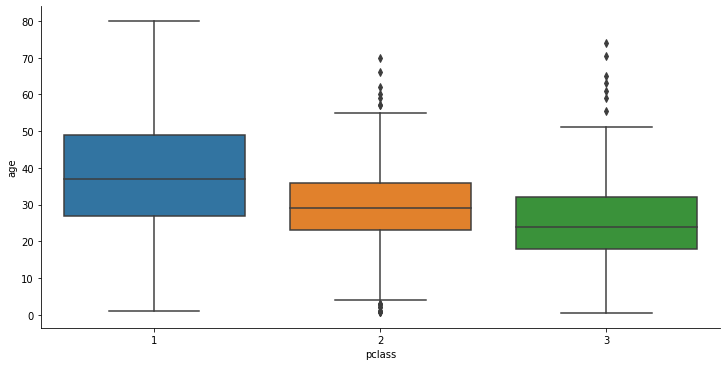

In [123]:
sns.catplot(data=titanic_df, x='pclass', y='age',kind='box', aspect=2)


The box plot provides us...
- The mean age - middle line of the box
- The age at the 25th percentile - bottom of the box - 25% of points are lower than this.
- The age at the 75th percentile - top of the box - 75% of points are lower than this, 25% are higher than this
- A sense of the spread - The whiskers show the range of the lowest 25% and the highest 25%.
- Outliers - Determined as individual points that are more than 1.5x higher or lower than the length of the box.

Those whiskers on the box plots hide information too. We could also use a violin plot which tries to tell us the full distribution.

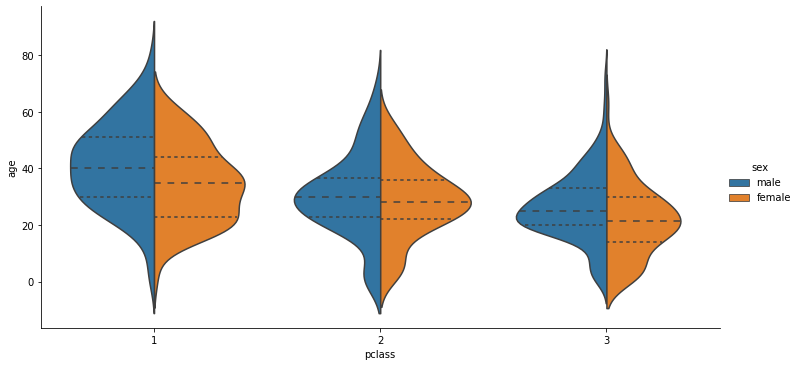

In [136]:
sns.catplot(data=titanic_df, x='pclass', y='age',kind='violin', hue='sex', split=True, aspect=2,inner='quart')


Violin plots don't give us precise numbers, the more values that fall into an area, the further out or wider the curve gets pushed. So the widest point on each plot is the value with the most data points. We've split our violins by sex, and asked for the `quart`ile range to be displayed inside each half. This allows us to see the age differences not only between classes, but within a class as well.

We can also see that the box plot has hidden some of the patterns we can see with the violin, for example the increased density of children in 2nd class. 

The violin plot does however come with the risk of 'fabricating' data at the extreme ends of the distribution. For example there are no passengers over the age of 80. This occurs because of the way the plot calculates density.

## Exercises Section 1